TypeError: Input z must be 2D, not 1D

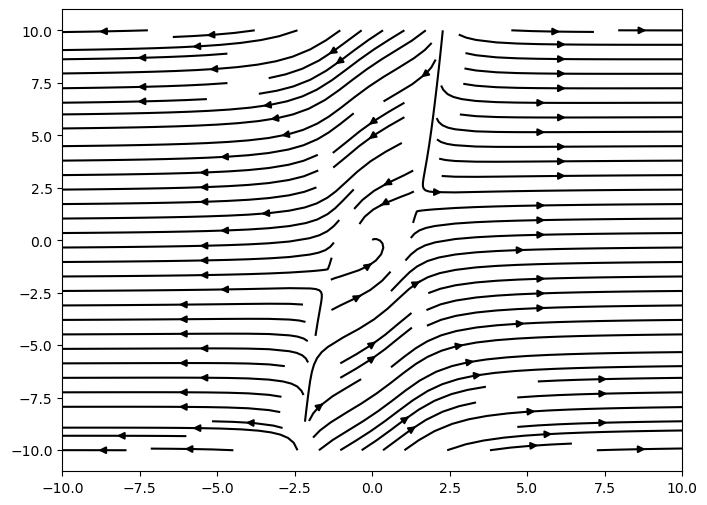

In [5]:
import numpy as np

import matplotlib.pyplot as plt


# Definir el sistema de ecuaciones diferenciales

def system(x, y):

    dxdt = x**3 - x - y

    dydt = x - y

    return dxdt, dydt


# Crear una grilla uniforme
x_vals = np.linspace(-5, 5, 20)  # Más puntos para un gráfico más denso

y_vals = np.linspace(-5, 5, 20)

X, Y = np.meshgrid(x_vals, y_vals)


# Define the system of differential equations

def system(x, y):

    dxdt = x**3 - x - y

    dydt = x - y

    return dxdt, dydt


# Create a grid of points
x = np.linspace(-10, 10, 400)

y = np.linspace(-10, 10, 400)

X, Y = np.meshgrid(x, y)


# Compute the derivatives at each point

DX, DY = system(X, Y)


# Plot the phase diagram

plt.figure(figsize=(8, 6))

plt.streamplot(X, Y, DX, DY, color='black')


# Calculate and plot the nullclines

nullcline_x = x**3 - x - y

nullcline_y = x - y


plt.contour(X, Y, nullcline_x, levels=[0], colors='red', label='dx/dt = 0')

plt.contour(X, Y, nullcline_y, levels=[0], colors='blue', label='dy/dt = 0')


plt.xlabel('x')

plt.ylabel('y')

plt.title('Phase Diagram with Nullclines')

plt.grid()

plt.legend()

plt.show()


# Calcular el campo vectorial en cada punto de la grilla

U, V = system(X, Y)


# Normalizar los vectores para que todas las flechas tengan el mismo tamaño

magnitude = 3*np.sqrt(U**2 + V**2)

U /= magnitude

V /= magnitude


# Graficar el campo vectorial

plt.figure(figsize=(8, 8))

plt.quiver(X, Y, U, V, color="blue", angles="xy", scale_units="xy", scale=1)


# Configuración adicional del gráfico

plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Eje x

plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # Eje y

plt.title("Campo Vectorial en la Grilla Uniforme")

plt.xlabel("x")

plt.ylabel("y")

plt.xlim(-5, 5)

plt.ylim(-5, 5)

plt.grid(True)

plt.show()

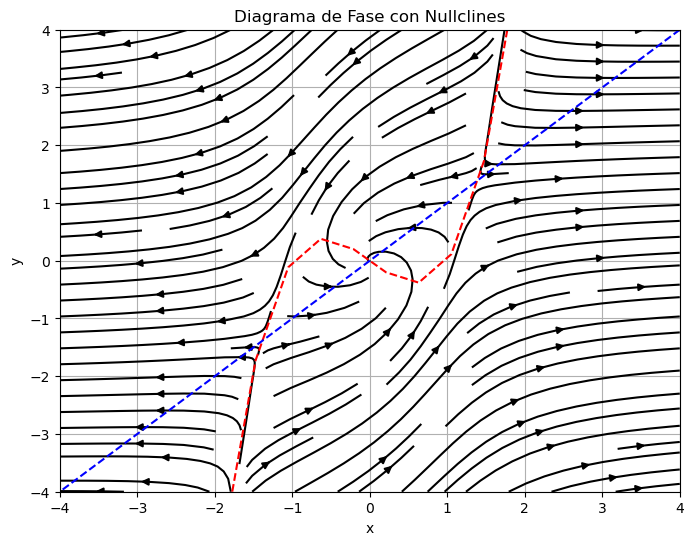

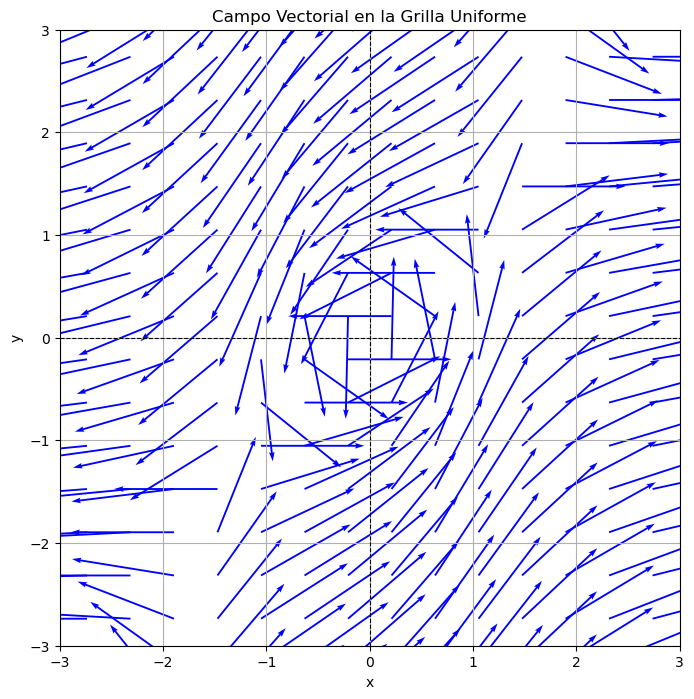

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones diferenciales
def system(x, y):
    dxdt = x**3 - x - y
    dydt = x - y
    return dxdt, dydt

# Crear una grilla uniforme
x_vals = np.linspace(-4, 4, 20)
y_vals = np.linspace(-4, 4, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular el campo vectorial
DX, DY = system(X, Y)

# Graficar el diagrama de fase con líneas de corriente
plt.figure(figsize=(8, 6))
plt.streamplot(X, Y, DX, DY, color='black')

# Calcular y graficar las nullclines
plt.contour(X, Y, DX, levels=[0], colors='red', linestyles='dashed')
plt.contour(X, Y, DY, levels=[0], colors='blue', linestyles='dashed')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Diagrama de Fase con Nullclines')
plt.grid()
plt.show()

# Normalizar el campo vectorial para la visualización
magnitude = np.sqrt(DX**2 + DY**2)
magnitude[magnitude == 0] = 1  # Evita divisiones por cero
U, V = DX / magnitude, DY / magnitude

# Graficar el campo vectorial
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, color="blue", angles="xy", scale_units="xy", scale=1)

# Configuración adicional del gráfico
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # Eje x
plt.axvline(0, color="black", linewidth=0.8, linestyle="--")  # Eje y
plt.title("Campo Vectorial en la Grilla Uniforme")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True)
plt.show()


In [9]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Arrow, VeeHead

# Definir el sistema de ecuaciones diferenciales
def system(x, y):
    dxdt = x**3 - x - y
    dydt = x - y
    return dxdt, dydt

# Crear una malla uniforme
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular el campo vectorial
DX, DY = system(X, Y)

# Normalizar los vectores para que todas las flechas tengan el mismo tamaño
magnitude = np.sqrt(DX**2 + DY**2)
DX /= magnitude
DY /= magnitude

# Crear los puntos de inicio y fin de las flechas
x_start = X.flatten()
y_start = Y.flatten()
x_end = x_start + 0.1 * DX.flatten()
y_end = y_start + 0.1 * DY.flatten()

# Crear la figura
p = figure(title="Streamplot en Bokeh", width=600, height=600,
           x_range=(-2, 2), y_range=(-2, 2))

# Agregar flechas
for xs, ys, xe, ye in zip(x_start, y_start, x_end, y_end):
    p.add_layout(Arrow(x_start=xs, y_start=ys, x_end=xe, y_end=ye,
                        end=VeeHead(size=7), line_width=1.5))

# Mostrar la gráfica
show(p)
